In [5]:
# Import relevant libraries
import requests  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display options for pandas DataFrame to show more rows and columns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)

# Defining the host for the Frankfurter API
host = "www.frankfurter.app"

# Constructing the URL for fetching exchange rate data for a specific time range
url = f"https://{host}/2013-01-01..2023-12-31"

# Printing the constructed URL to the console for verification
print()
print(url)
print()


https://www.frankfurter.app/2013-01-01..2023-12-31



In [14]:
# Sending a GET request to the Frankfurter API to retrieve exchange rate data
response = requests.get(url)

# Parsing the JSON response into a Python dictionary
data = response.json()

# Creating a pandas DataFrame from the JSON data
eur_df = pd.DataFrame(data)

# Normalizing the "rates" column of the DataFrame to expand nested data into separate columns
eur_df_rates = pd.json_normalize(eur_df["rates"])

# Resetting the index of the DataFrame to default integer index
eur_df = eur_df.reset_index()

# Renaming the previous index column as "index_date"
eur_df = eur_df.rename(columns={"index": "index_date"})

# Convert the 'Date' column to DateTime format
eur_df["index_date"] = pd.to_datetime(eur_df["index_date"], format="ISO8601")

# Dropping the "rates" column from the DataFrame
eur_df = eur_df.drop("rates", axis=1)

# Concatenating the DataFrame containing the index and the normalized rates DataFrame horizontally
eur_df = pd.concat([eur_df, eur_df_rates], axis=1)

# Display truncated Info of Data Frame
print()
eur_df.info(verbose=False, memory_usage="deep")
print()

# Generate descriptive statistics for the Data Frame
eur_df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Columns: 39 entries, index_date to ISK
dtypes: datetime64[ns](1), float64(34), int64(1), object(3)
memory usage: 270.3 KB



,count,mean,min,25%,50%,75%,max,std
index_date,574,2018-06-28 12:00:00,2012-12-31 00:00:00,2015-09-29 18:00:00,2018-06-28 12:00:00,2021-03-27 06:00:00,2023-12-25 00:00:00,NaN
amount,574.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
AUD,574.0,1.532103,1.229,1.4684,1.5464,1.60125,1.8383,0.094395
BGN,574.0,1.955118,1.5646,1.9558,1.9558,1.9558,1.9558,0.016328
BRL,574.0,4.452196,2.5497,3.459,4.326,5.37515,6.801,1.156414
CAD,574.0,1.458304,1.293,1.42195,1.4639,1.504325,1.5971,0.064165
CHF,574.0,1.101135,0.93333,1.0588,1.0894,1.1539,1.2497,0.077833
CNY,574.0,7.644716,6.6044,7.34895,7.7125,7.884475,8.6674,0.418751
CZK,574.0,26.014655,23.376,25.448,25.856,27.029,28.111,1.105995
DKK,574.0,7.450612,7.4334,7.4399,7.45015,7.4605,7.4731,0.011135


In [9]:
eur_df[eur_df["USD"].isin([1.3896, 0.96618])]

,index_date,amount,base,start_date,end_date,AUD,BGN,BRL,CAD,CHF,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
70,2014-05-05,1.0,EUR,2012-12-31,2023-12-25,1.4877,1.9558,3.0911,1.5148,1.21790,...,4.1972,4.4358,49.16,9.0527,1.7348,45.067,2.9017,1.38960,14.5214,NaN
508,2022-09-26,1.0,EUR,2012-12-31,2023-12-25,1.4940,1.9558,5.1914,1.3249,0.95188,...,4.8069,4.9464,NaN,10.9115,1.3898,36.703,17.8879,0.96618,17.3869,139.78


In [42]:
# Keep specific columns
eur_usd_df = eur_df[["index_date","USD"]]

eur_usd_dfy = eur_usd_df.copy()
eur_usd_dfy['year'] = eur_usd_dfy['index_date'].dt.year

usd_groupby_yr= eur_usd_dfy.groupby('year').USD.mean().reset_index()

usd_groupby_yr

,year,USD
0,2012,1.312500
1,2013,1.328696
2,2014,1.327123
3,2015,1.108737
4,2016,1.106823
5,2017,1.129548
6,2018,1.180574
7,2019,1.119200
8,2020,1.142379
9,2021,1.182723


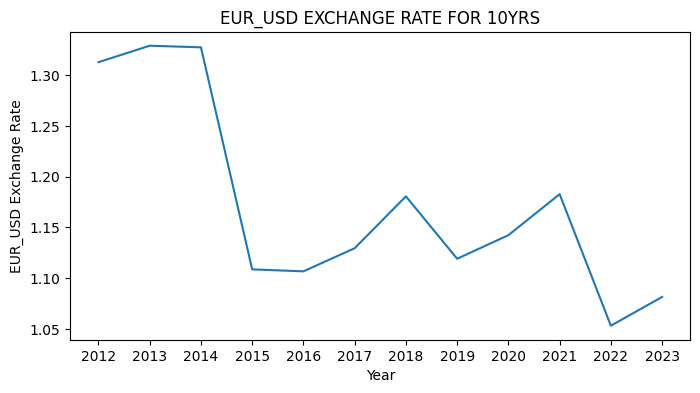

In [26]:
#set x and y axis to year and usd rates using the average yearly rate for 10 years
x = usd_groupby_yr['year'].astype(str)
y = usd_groupby_yr['USD']
 
plt.figure(figsize=(8,4))
plt.plot(x, y)
#set the title
plt.title("EUR_USD EXCHANGE RATE FOR 10YRS")
#set x and y label
plt.xlabel("Year")
plt.ylabel("EUR_USD Exchange Rate")
plt.show()

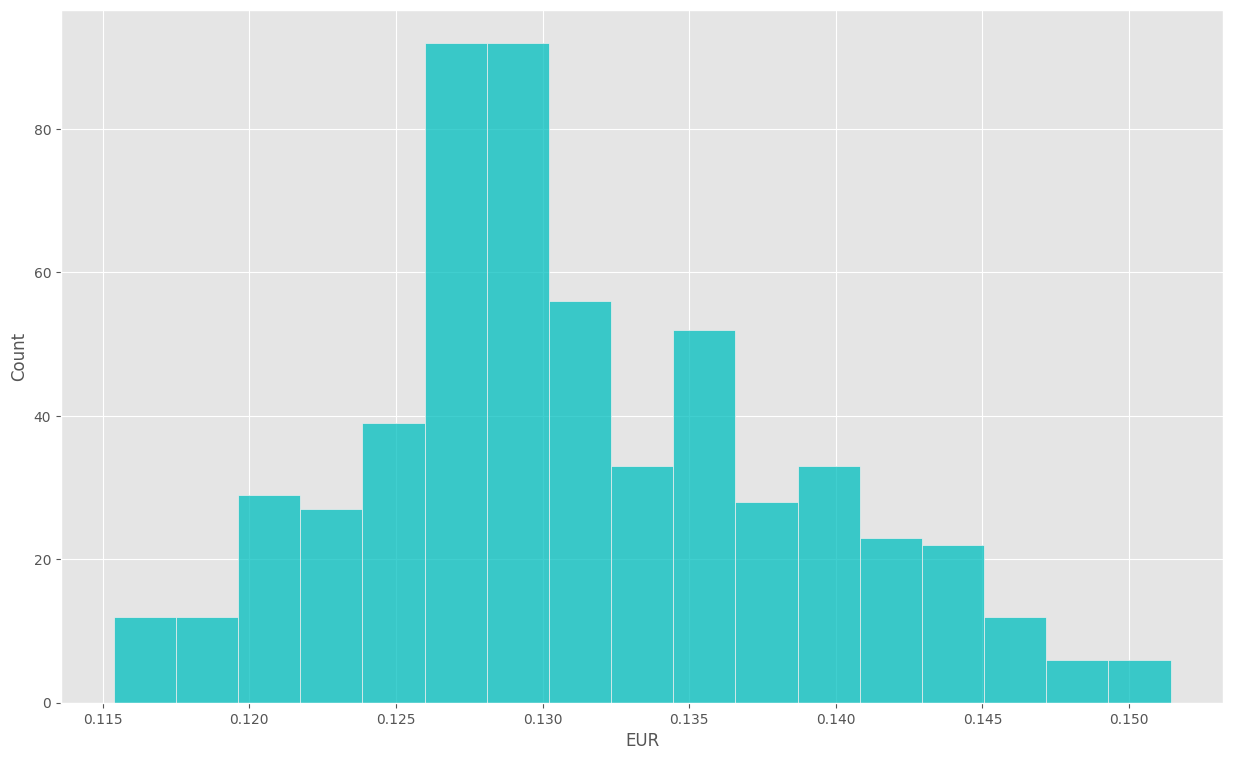

In [32]:
# Keep specific columns
eur_cny_df = eur_df[["index_date","CNY"]]

cny_eur_df = eur_cny_df.copy()


cny_eur_df["EUR"] = 1/cny_eur_df["CNY"]


cny_eur_df["CNY"] = 1

cny_eur_df

plt.style.use("ggplot")

plt.figure(figsize=(15,9))

sns.histplot(data=cny_eur_df, x="EUR", color="c")

plt.show()

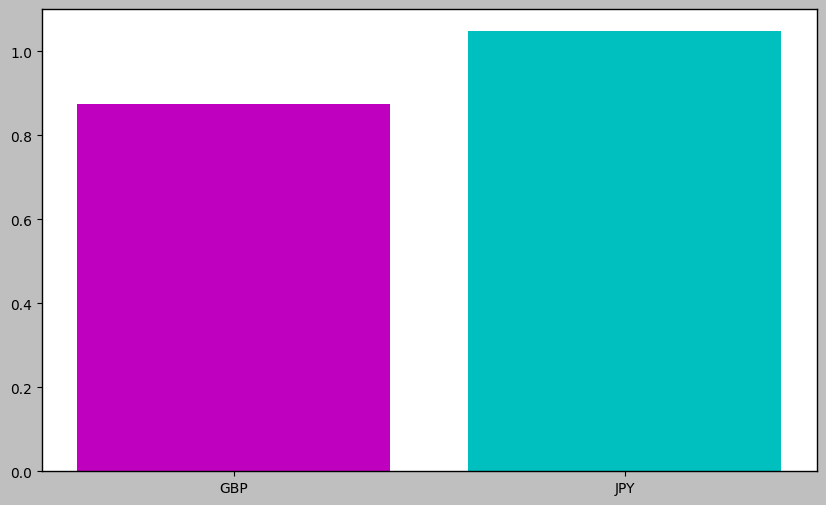

In [41]:
# Keep specific columns
eur_gbp_df = eur_df[["index_date","GBP"]]
eur_jpy_df = eur_df[["index_date","JPY"]]


gbp_eur_df = eur_gbp_df.copy()
jpy_eur_df = eur_jpy_df.copy()

gbp_eur_df["EUR"] = 1/gbp_eur_df["GBP"]
jpy_eur_df["EUR"] = 1/jpy_eur_df["JPY"]

gbp_eur_df["GBP"] = 1
jpy_eur_df["JPY"] = 1

gbp_eur_df["%_change"] = gbp_eur_df["EUR"].pct_change()*100
jpy_eur_df["%_change"] = jpy_eur_df["EUR"].pct_change()*100

gbp_volatitly =gbp_eur_df["%_change"].std()
jpy_volatitly =jpy_eur_df["%_change"].std()

plt.style.use("grayscale")

plt.figure(figsize=(10,6))

plt.bar(["GBP", "JPY"], [gbp_volatitly, jpy_volatitly], color=["m","c"])

plt.grid(False)

plt.show()

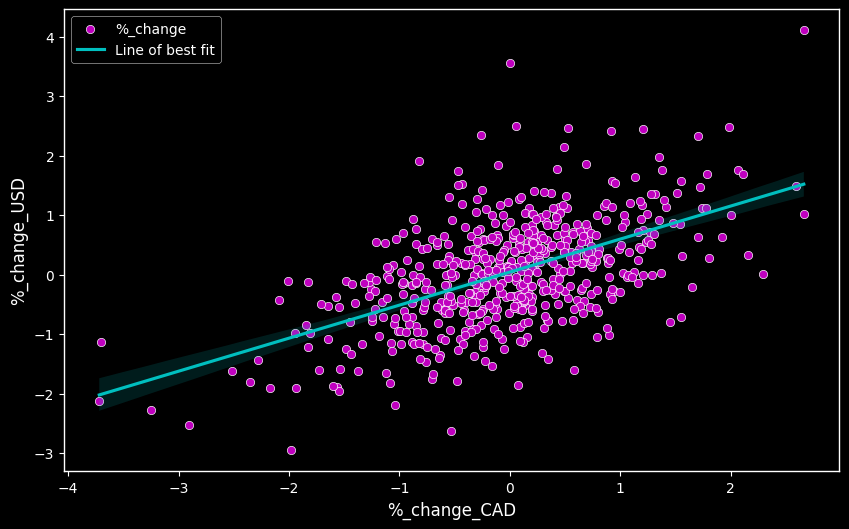


The correlation between CAD and USD is 0.55



In [57]:
# Keep specific columns
eur_cad_df = eur_df[["index_date","CAD"]]



cad_eur_df = eur_cad_df.copy()
usd_eur_df = eur_usd_df.copy()

cad_eur_df["EUR"] = 1/cad_eur_df["CAD"]
usd_eur_df["EUR"] = 1/usd_eur_df["USD"]

cad_eur_df["CAD"] = 1
usd_eur_df["USD"] = 1

cad_eur_df["%_change"] = cad_eur_df["EUR"].pct_change()*100
usd_eur_df["%_change"] = usd_eur_df["EUR"].pct_change()*100

merged_df = pd.merge(cad_eur_df, usd_eur_df, on="index_date", suffixes=("_CAD", "_USD"))

correlation = merged_df["%_change_CAD"].corr(merged_df["%_change_USD"])

plt.style.use("dark_background")

plt.figure(figsize=(10,6))

sns.scatterplot(data=merged_df,x="%_change_CAD",y="%_change_USD",color="m",label="%_change")

sns.regplot(data=merged_df,x="%_change_CAD",y="%_change_USD",scatter=False,color="c",label="Line of best fit")

plt.legend()

plt.grid(False)

print()
plt.show()
print()
print(F"The correlation between CAD and USD is {correlation:.2f}")
print()